## House Price Prediction using Machine Learning

# Data Collection

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("dataset.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHASS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHASS    506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CRIM'].value_counts()

0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: CRIM, Length: 504, dtype: int64

In [6]:
housing['TAX'].value_counts()

666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: TAX, Length: 66, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHASS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHASS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

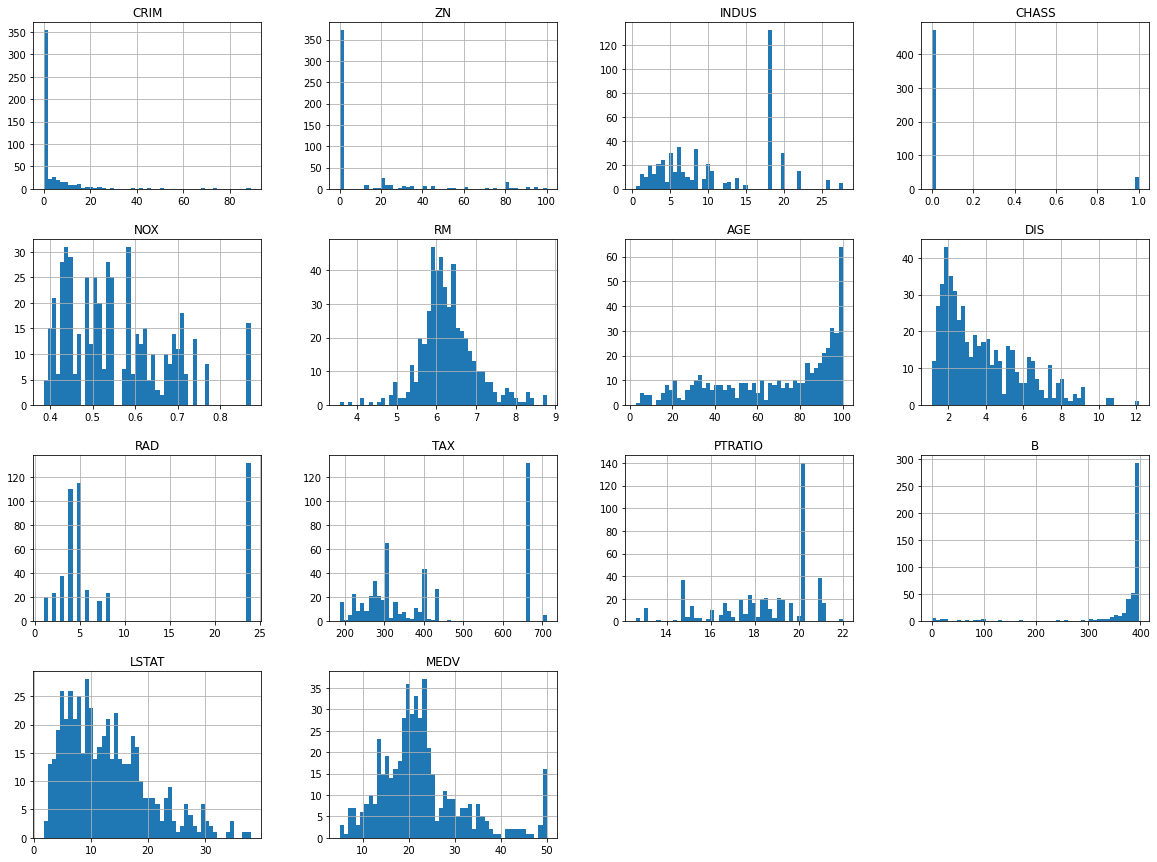

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plot 
housing.hist(bins=50 , figsize=(20,15))

# Train-Test Splitting of Data

In [9]:
#For learning purpose
import numpy as np 
def split_train_test(data,test_ratio):
    np.random.seed(42) # to fixed same permutation
    shuffled=np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_size]
    train_indices=shuffled[test_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set,test_set=split_train_test(housing,0.2)

In [11]:
# print("train_set length : ",len(train_set))
# print("test_set length : ",len(test_set))
# print("total length : ",len(housing))

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("train_set length : ",len(train_set))
print("test_set length : ",len(test_set))
print("total length : ",len(housing))

train_set length :  404
test_set length :  102
total length :  506


In [13]:
#To avoid imvalence train set 
from sklearn.model_selection import StratifiedShuffleSplit 
split_data=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split_data.split(housing,housing['CHASS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_train_set['CHASS'].value_counts()

0    376
1     28
Name: CHASS, dtype: int64

In [15]:
strat_test_set['CHASS'].value_counts()

0    95
1     7
Name: CHASS, dtype: int64

In [16]:
housing=strat_train_set.copy()

# Finding correlation among features and label

In [17]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHASS      0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot: xlabel='CHASS', ylabel='RM'>,
        <AxesSubplot: xlabel='NOX', ylabel='RM'>,
        <AxesSubplot: xlabel='INDUS', ylabel='RM'>],
       [<AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot: xlabel='CHASS', ylabel='MEDV'>,
        <AxesSubplot: xlabel='NOX', ylabel='MEDV'>,
        <AxesSubplot: xlabel='INDUS', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot: xlabel='CHASS', ylabel='ZN'>,
        <AxesSubplot:

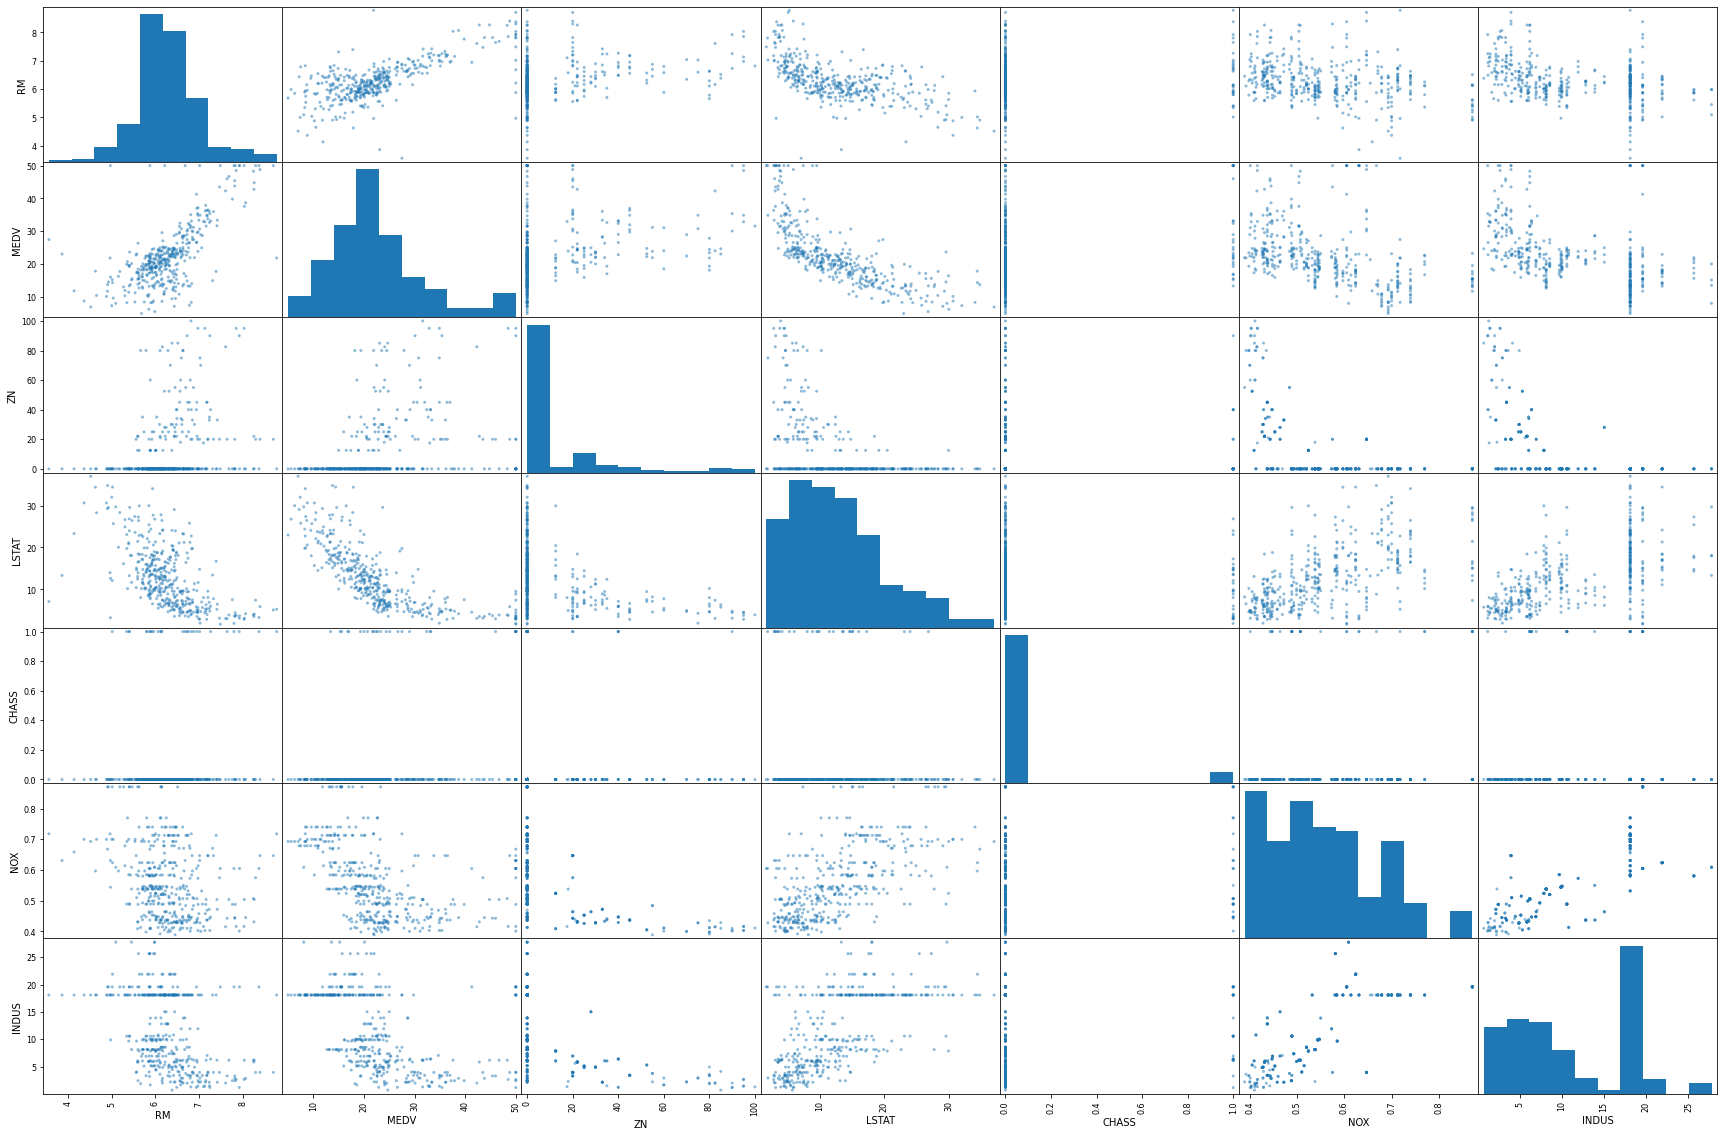

In [18]:
from pandas.plotting import scatter_matrix 
attributes=["RM","MEDV","ZN","LSTAT","CHASS","NOX","INDUS"]
scatter_matrix(housing[attributes],figsize=(30,20))

housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

In [19]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [20]:
#How to handles Missing attributres
# So there are three ways to handles:
#     1 :  to remove that whole data points 
#     2 : to remove whole attributes 
#     3 : to replace null value with 0 or mean or median 

#  original housing will remain unchange   
a=housing.dropna(subset=["RM"])   #option 1 
b=housing.drop("RM",axis=1)       #option 2 
median=housing["RM"].median()     #option 3
median

6.21

In [21]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

# filling null values in dataset using imputer class

In [22]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

## feature scaling 
Primarily, two types of feature scaling methods:

1. Min-max scaling (Normalization)

(value min)/(max - min)

Sklearn provides a class called MinMaxScaler for this

2. Standardization

(value mean)/std Sklearn provides a class called StandardScaler for this

## Scikit-learn Design

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method Fits the dataset and calculates internal parameters

2. Transformers transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

In [23]:
#StandardScaler  is used for normalising data for easy computing
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [24]:
housing_after_pipeline_use=my_pipeline.fit_transform(housing)
housing_after_pipeline_use

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [25]:
housing_after_pipeline_use.shape

(404, 13)

In [26]:
housing_labels.shape

(404,)

## Selecting Desire Model for price prediction 

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model1= LinearRegression()
# model1=DecisionTreeRegressor()
model1=RandomForestRegressor()
model1.fit(housing_after_pipeline_use,housing_labels)

RandomForestRegressor()

In [28]:
some_data=housing.iloc[0:5]
some_labels=housing_labels[0:5]
prepared_data=my_pipeline.transform(some_data)
model1.predict(prepared_data)

array([22.412, 25.414, 16.612, 23.322, 23.438])

In [29]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## Evaluating model 

In [30]:
from sklearn.metrics import mean_squared_error 
housing_predictions=model1.predict(housing_after_pipeline_use)
linear_mse=mean_squared_error (housing_labels,housing_predictions)
linear_rmse=np.sqrt(linear_mse)

In [31]:
linear_mse

1.4866042450495025

In [32]:
linear_rmse

1.2192638127368098

## using better evaluation techniques like cross validations 

In [33]:
from sklearn.model_selection import cross_val_score 
scores=cross_val_score(model1,housing_after_pipeline_use,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse=np.sqrt(-scores)
rmse

array([2.96155789, 2.78374751, 4.57758509, 2.74941044, 3.345873  ,
       2.65602552, 5.3510339 , 3.36645807, 3.17739919, 3.2375558 ])

In [34]:
def print_scores(scores):
    print("RMSE scores : ",scores)
    print("mean :",scores.mean())
    print("standard deviation :",scores.std())

In [35]:
print_scores(rmse)

RMSE scores :  [2.96155789 2.78374751 4.57758509 2.74941044 3.345873   2.65602552
 5.3510339  3.36645807 3.17739919 3.2375558 ]
mean : 3.420664640183811
standard deviation : 0.8256952878759501


## launching model 

In [36]:
from joblib import dump,load
dump(model1,"price_prediction_model1.joblib")

['price_prediction_model1.joblib']

## testing our model with test data 

In [37]:
x_test=strat_test_set.drop("MEDV",axis=1)
x_labels=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model1.predict(x_test_prepared)
final_mse=mean_squared_error(x_labels,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

3.0157506479462515